# 自编码模型

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np


# torch.manual_seed(1)    # reproducible

# Hyper Parameters
EPOCH = 10
BATCH_SIZE = 64
LR = 0.005         # learning rate
DOWNLOAD_MNIST = False
N_TEST_IMG = 5

# Mnist digits dataset
train_data = torchvision.datasets.MNIST(
    root='./data',
    train=True,                                     # this is training data
    transform=torchvision.transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                                    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,                        # download it if you don't have it
)

torch.Size([60000, 28, 28])
torch.Size([60000])


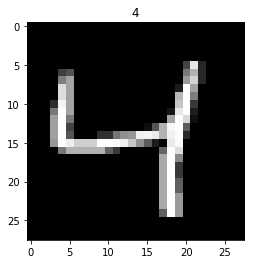

In [2]:
# plot one example
print(train_data.data.size())     # (60000, 28, 28)
print(train_data.targets.size())   # (60000)
plt.imshow(train_data.data[2].numpy(), cmap='gray')
plt.title('%i' % train_data.targets[2])
plt.show()

In [3]:
# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [4]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 12),
            nn.Tanh(),
            nn.Linear(12, 3),   # compress to 3 features which can be visualized in plt
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.Tanh(),
            nn.Linear(12, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),       # compress to a range (0, 1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [5]:
autoencoder = AutoEncoder()

optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
loss_func = nn.MSELoss()

Epoch:  0 | train loss: 0.2333


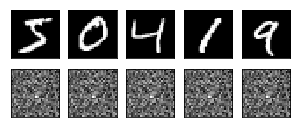

Epoch:  0 | train loss: 0.0613


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0566


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0535


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0483


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0464


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0427


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0416


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0387


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0416


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0385


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0371


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0373


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0419


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0397


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0346


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0362


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0371


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0357


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0386


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0340


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0377


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0396


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0364


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0385


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0357


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0355


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0351


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0317


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0359


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0315


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0377


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0383


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0354


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0301


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0345


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0400


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0360


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0344


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0337


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0296


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0329


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0368


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0334


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0319


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0333


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0321


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0369


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0355


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0336


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0305


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0350


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0329


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0310


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0407


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0318


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0326


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0349


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0378


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0346


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0321


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0377


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0340


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0318


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0327


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0359


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0403


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0343


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0323


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0344


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0329


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0342


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0314


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0321


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0350


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0348


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0329


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0318


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0291


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0319


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0332


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0330


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0339


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0316


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0323


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0305


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0302


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0371


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0297


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0308


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0321


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0325


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0318


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0324


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0294


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0307


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0345


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0349


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0300


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0336


<Figure size 432x288 with 0 Axes>

In [6]:
# initialize figure
f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
plt.ion()   # continuously plot
# original data (first row) for viewing
view_data = Variable(train_data.data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.)
for i in range(N_TEST_IMG):
    a[0][i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)), cmap='gray'); a[0][i].set_xticks(()); a[0][i].set_yticks(())

for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        b_x = Variable(x.view(-1, 28*28))   # batch x, shape (batch, 28*28)
        b_y = Variable(x.view(-1, 28*28))   # batch y, shape (batch, 28*28)
        b_label = Variable(y)               # batch label

        encoded, decoded = autoencoder(b_x)

        loss = loss_func(decoded, b_y)      # mean square error
        optimizer.zero_grad()               # clear gradients for this training step
        loss.backward()                     # backpropagation, compute gradients
        optimizer.step()                    # apply gradients

        if step % 100 == 0:
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.item())

            # plotting decoded image (second row)
            _, decoded_data = autoencoder(view_data)
            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i], (28, 28)), cmap='gray')
                a[1][i].set_xticks(()); a[1][i].set_yticks(())
            plt.draw(); plt.pause(0.05)
            
plt.ioff()
plt.show()